In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/raw_data/users.csv')

In [3]:
df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
def extract_country(location):
    return location.split(',')[-1].strip()

df['Country'] = df['Location'].apply(extract_country)

In [6]:
df["Country"].value_counts(normalize=True)

Country
usa                0.501011
canada             0.077667
united kingdom     0.066478
germany            0.061117
spain              0.047146
                     ...   
19104              0.000004
minnehaha          0.000004
de                 0.000004
china öð¹ú         0.000004
united kingdom.    0.000004
Name: proportion, Length: 709, dtype: float64

In [7]:
dict(df.Country.value_counts()[:50]).keys()

dict_keys(['usa', 'canada', 'united kingdom', 'germany', 'spain', 'australia', 'italy', '', 'france', 'portugal', 'new zealand', 'netherlands', 'switzerland', 'brazil', 'china', 'sweden', 'india', 'austria', 'malaysia', 'argentina', 'singapore', 'finland', 'mexico', 'belgium', 'denmark', 'ireland', 'philippines', 'turkey', 'poland', 'pakistan', 'greece', 'iran', 'chile', 'romania', 'israel', 'south africa', 'indonesia', 'norway', 'japan', 'croatia', 'nigeria', 'south korea', 'slovakia', 'czech republic', 'russia', 'yugoslavia', 'hong kong', 'costa rica', 'taiwan', 'slovenia'])

In [8]:
popular_countries = list(dict(df.Country.value_counts()[:50]).keys())
popular_countries

['usa',
 'canada',
 'united kingdom',
 'germany',
 'spain',
 'australia',
 'italy',
 '',
 'france',
 'portugal',
 'new zealand',
 'netherlands',
 'switzerland',
 'brazil',
 'china',
 'sweden',
 'india',
 'austria',
 'malaysia',
 'argentina',
 'singapore',
 'finland',
 'mexico',
 'belgium',
 'denmark',
 'ireland',
 'philippines',
 'turkey',
 'poland',
 'pakistan',
 'greece',
 'iran',
 'chile',
 'romania',
 'israel',
 'south africa',
 'indonesia',
 'norway',
 'japan',
 'croatia',
 'nigeria',
 'south korea',
 'slovakia',
 'czech republic',
 'russia',
 'yugoslavia',
 'hong kong',
 'costa rica',
 'taiwan',
 'slovenia']

In [9]:
popular_countries.remove("")
popular_countries

['usa',
 'canada',
 'united kingdom',
 'germany',
 'spain',
 'australia',
 'italy',
 'france',
 'portugal',
 'new zealand',
 'netherlands',
 'switzerland',
 'brazil',
 'china',
 'sweden',
 'india',
 'austria',
 'malaysia',
 'argentina',
 'singapore',
 'finland',
 'mexico',
 'belgium',
 'denmark',
 'ireland',
 'philippines',
 'turkey',
 'poland',
 'pakistan',
 'greece',
 'iran',
 'chile',
 'romania',
 'israel',
 'south africa',
 'indonesia',
 'norway',
 'japan',
 'croatia',
 'nigeria',
 'south korea',
 'slovakia',
 'czech republic',
 'russia',
 'yugoslavia',
 'hong kong',
 'costa rica',
 'taiwan',
 'slovenia']

In [10]:
df['Country'] = df['Country'].apply(lambda x: x if x in popular_countries else 'other')

In [11]:
df['Country'].value_counts()

Country
usa               139711
canada             21658
united kingdom     18538
germany            17043
spain              13147
australia          11784
italy              11266
other               9490
france              3455
portugal            3325
new zealand         3097
netherlands         3025
switzerland         1745
brazil              1674
china               1488
sweden              1406
india               1290
austria             1136
malaysia            1119
argentina           1083
singapore            925
finland              923
mexico               840
belgium              819
denmark              805
ireland              753
philippines          743
turkey               490
poland               454
pakistan             442
greece               421
iran                 396
romania              357
chile                357
israel               345
south africa         330
indonesia            305
norway               289
japan                272
croatia          

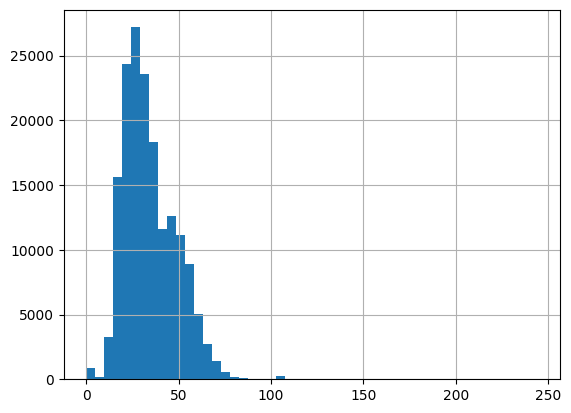

In [12]:
df["Age"].hist(bins=50)
plt.show()

In [13]:
df['Age'] = df['Age'].apply(lambda x: x if x > 3 and x < 110 else pd.NA)

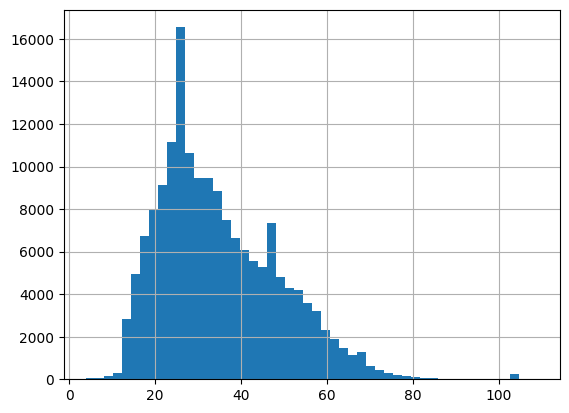

In [14]:
df["Age"].hist(bins=50)
plt.show()

In [15]:
df

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",<NA>,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",<NA>,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",<NA>,united kingdom
...,...,...,...,...
278853,278854,"portland, oregon, usa",<NA>,usa
278854,278855,"tacoma, washington, united kingdom",50.0,united kingdom
278855,278856,"brampton, ontario, canada",<NA>,canada
278856,278857,"knoxville, tennessee, usa",<NA>,usa


In [16]:
df.to_csv("data/processed_users.csv", index=False)